SVD

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import time
from pathlib import Path
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sys import getsizeof
%matplotlib inline
from tqdm import tqdm

In [3]:
#household_power_consumption.txt
dataset = pd.read_csv(
    "../Datasets/Household_Electric_Power_Consumption/household_power_consumption.csv",
    #parse_dates={'Datetime': ['Date', 'Time']},
    na_values='?')
dataset.dropna(inplace=True)

features = dataset[['Global_active_power',
                'Global_reactive_power',
                'Voltage',
                'Global_intensity',
                'Sub_metering_1',
                'Sub_metering_2',
                'Sub_metering_3']].astype(np.float32)

startTime = time.time()
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
svd = TruncatedSVD(n_components=7)
SVDDataset = pd.DataFrame(svd.fit_transform(scaled_features)).astype(np.float32)
endSVDcalcTime = time.time()
print("Time to apply SVD: " + str(endSVDcalcTime - startTime))
#Saving the data for future use
SVDDataset.to_csv('./Results/household_power_consumption/SVD_Results.csv', mode='w', index=False)
#calculating error based on number of dimensions
rootMeanSquaredValues = []
meanAbsoluteErrorValues = []
rSquaredErrorValues = []
Variance = svd.explained_variance_ratio_
compressionRatio = []
dimensions = range(1, scaled_features.shape[1] + 1)
for d in tqdm(dimensions):
    svd = TruncatedSVD(n_components=d)
    datasetReduced = svd.fit_transform(scaled_features).astype(np.float32) 
    datasetReconstructed = svd.inverse_transform(datasetReduced)
    rootMeanSquaredValues.append(root_mean_squared_error(scaled_features, datasetReconstructed, multioutput='uniform_average'))
    meanAbsoluteErrorValues.append(mean_absolute_error(scaled_features, datasetReconstructed))
    rSquaredErrorValues.append(r2_score(scaled_features, datasetReconstructed))
    compressionRatio.append(getsizeof(datasetReduced) / getsizeof(scaled_features) )
endErrorCalcTime = time.time()
print("Time taken to compute Errors: " + str(endErrorCalcTime - startTime))
Details = pd.DataFrame({
    'Root Mean Squared Values' : rootMeanSquaredValues,
    'Mean Absolute Values' : meanAbsoluteErrorValues,
    'R Squared Error Values' : rSquaredErrorValues,
    'Variance' : Variance,
    'Compression Ratio' : compressionRatio
    })
Details.index += 1
Details.to_csv('./Results/household_power_consumption/Details SVD.csv', mode='w', index=False)


Time to apply SVD: 1.5739328861236572


100%|██████████| 7/7 [00:10<00:00,  1.54s/it]

Time taken to compute Errors: 26.952696561813354


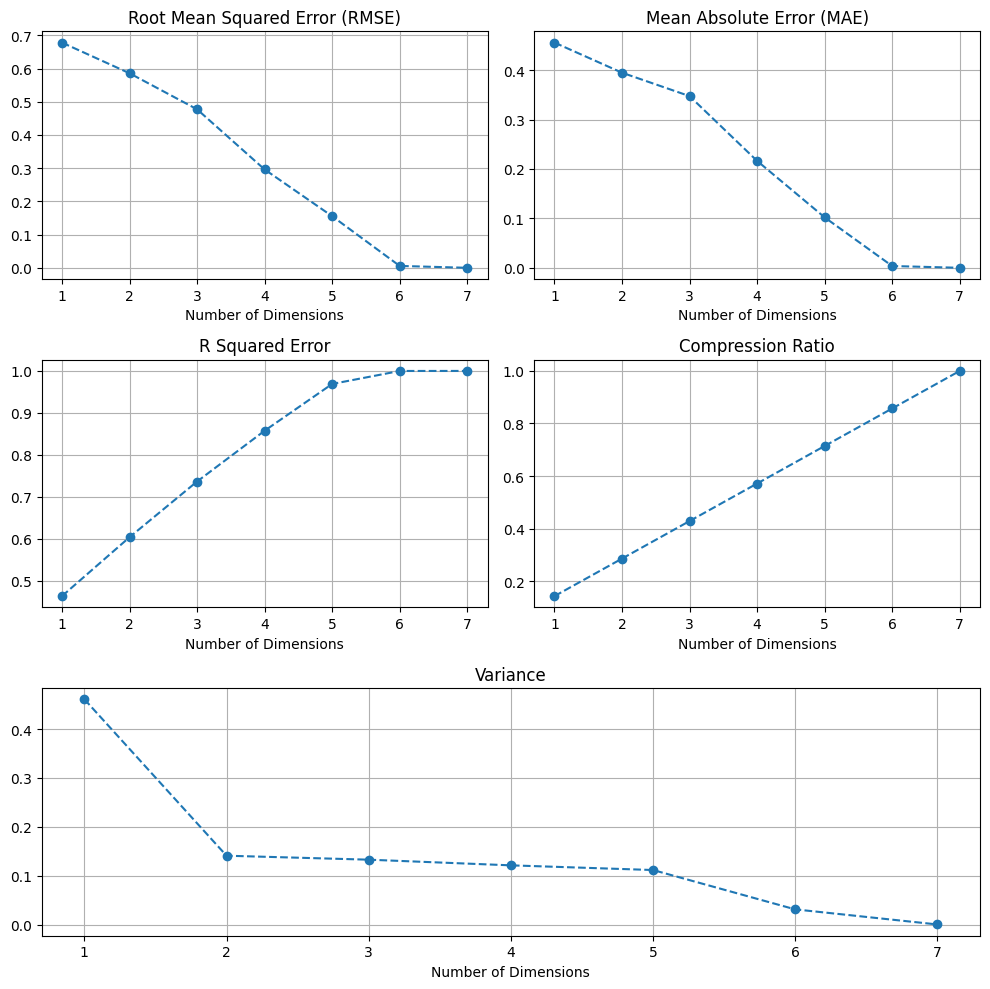

In [4]:
#Plotting the results
errorValues = pd.read_csv(
    "./Results/household_power_consumption/Details SVD.csv",
    )
errorValues.index += 1
numRows, numColums = errorValues.shape
plt.figure(figsize=(10, 10))
plt.subplot(3,2,1)
plt.plot(errorValues[['Root Mean Squared Values']], marker='o', linestyle='--')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(3,2,2)
plt.plot(errorValues[['Mean Absolute Values']], marker='o', linestyle='--')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(3,2,3)
plt.plot(errorValues[['R Squared Error Values']], marker='o', linestyle='--')
plt.title('R Squared Error')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(3,2,4)
plt.plot(errorValues[['Compression Ratio']], marker='o', linestyle='--')
plt.title('Compression Ratio')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(3,1,3)
plt.plot(errorValues[['Variance']], marker='o', linestyle='--')
plt.title('Variance')
plt.xlabel('Number of Dimensions')
plt.grid()
plt.tight_layout()
plt.show()


In [2]:
#PMU October 1 Dataset
dataset = pd.read_csv(
    "../Datasets/Micro PMU October 1 Dataset/_LBNL_a6_bus1_2015-10-01.csv")
dataset.dropna(inplace=True)
features = dataset[['VL1',
                'VL2',
                'VL3',
                'AL1',
                'AL2',
                'AL3',
                'IC1',
                'IC2',
                'IC3',
                'AC1',
                'AC2',
                'AC3',
                'Events']].astype(np.float32)

startTime = time.time()
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
svd = TruncatedSVD(n_components=13)
SVDDataset = pd.DataFrame(svd.fit_transform(scaled_features)).astype(np.float32)
endSVDcalcTime = time.time()
print("Time to apply SVD: " + str(endSVDcalcTime - startTime))
#Saving the data for future use
SVDDataset.to_csv('./Results/Micro PMU October 1 Dataset/SVD_Results.csv', mode='w', index=False)
#calculating error based on number of dimensions
rootMeanSquaredValues = []
meanAbsoluteErrorValues = []
rSquaredErrorValues = []
Variance = svd.explained_variance_ratio_
compressionRatio = []
dimensions = range(1, scaled_features.shape[1] + 1)
for d in tqdm(dimensions):
    svd = TruncatedSVD(n_components=d)
    datasetReduced = svd.fit_transform(scaled_features).astype(np.float32) 
    datasetReconstructed = svd.inverse_transform(datasetReduced)
    rootMeanSquaredValues.append(root_mean_squared_error(scaled_features, datasetReconstructed, multioutput='uniform_average'))
    meanAbsoluteErrorValues.append(mean_absolute_error(scaled_features, datasetReconstructed))
    rSquaredErrorValues.append(r2_score(scaled_features, datasetReconstructed))
    compressionRatio.append(getsizeof(datasetReduced) / getsizeof(scaled_features) )
endErrorCalcTime = time.time()
print("Time taken to compute Errors: " + str(endErrorCalcTime - startTime))
Details = pd.DataFrame({
    'Root Mean Squared Values' : rootMeanSquaredValues,
    'Mean Absolute Values' : meanAbsoluteErrorValues,
    'R Squared Error Values' : rSquaredErrorValues,
    'Variance' : Variance,
    'Compression Ratio' : compressionRatio
    })
Details.index += 1
Details.to_csv('./Results/Micro PMU October 1 Dataset/Details SVD.csv', mode='w', index=False)


Time to apply SVD: 16.25959014892578


100%|██████████| 13/13 [03:14<00:00, 14.99s/it]

Time taken to compute Errors: 344.6862759590149


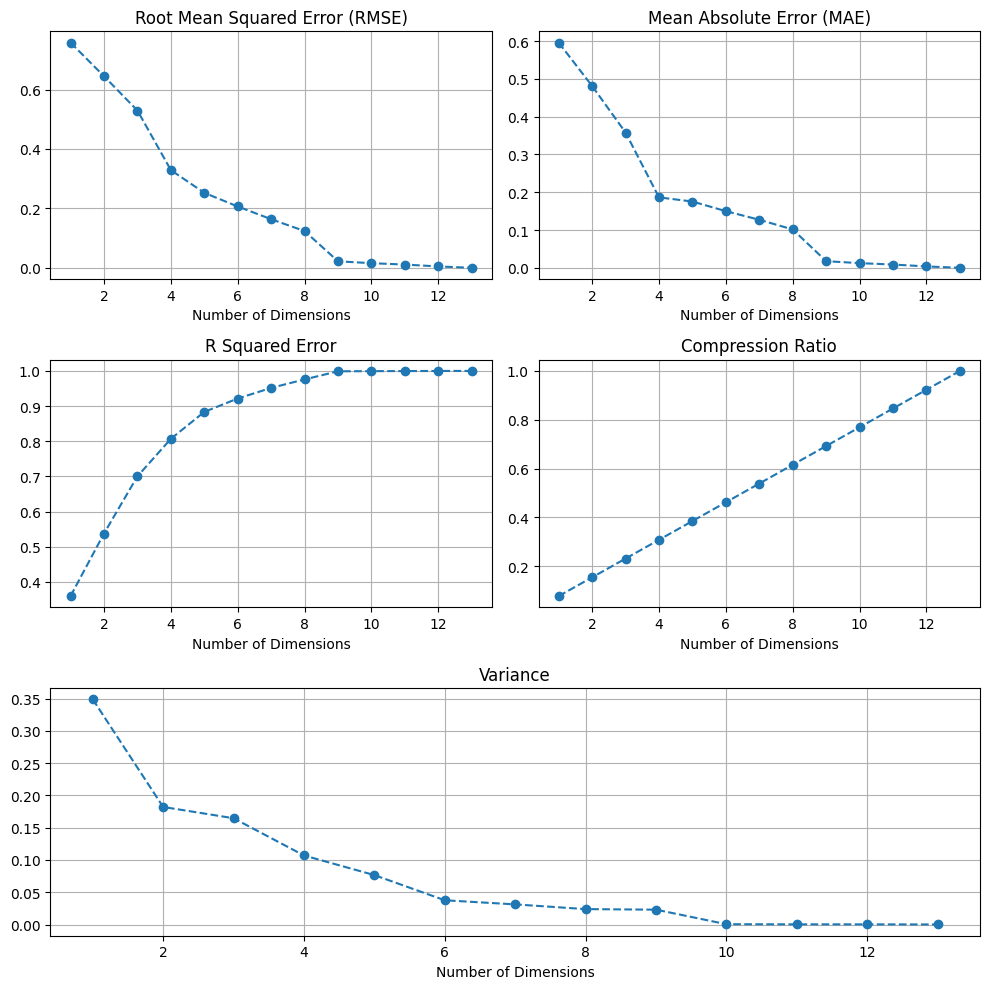

In [5]:
#Plotting the results
errorValues = pd.read_csv(
    "./Results/Micro PMU October 1 Dataset/Details SVD.csv",
    )
errorValues.index += 1
numRows, numColums = errorValues.shape
plt.figure(figsize=(10, 10))
plt.subplot(3,2,1)
plt.plot(errorValues[['Root Mean Squared Values']], marker='o', linestyle='--')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(3,2,2)
plt.plot(errorValues[['Mean Absolute Values']], marker='o', linestyle='--')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(3,2,3)
plt.plot(errorValues[['R Squared Error Values']], marker='o', linestyle='--')
plt.title('R Squared Error')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(3,2,4)
plt.plot(errorValues[['Compression Ratio']], marker='o', linestyle='--')
plt.title('Compression Ratio')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(3,1,3)
plt.plot(errorValues[['Variance']], marker='o', linestyle='--')
plt.title('Variance')
plt.xlabel('Number of Dimensions')
plt.grid()
plt.tight_layout()
plt.show()


In [5]:
#Smart Meters Dataset HH_block0
data = pd.read_csv(
    "../Datasets/Smart meters in London/hhblock_dataset/hhblock_dataset/block_0.csv")
data.dropna(inplace=True)

features = data[['hh_0','hh_1','hh_2','hh_3','hh_4','hh_5','hh_6','hh_7','hh_8','hh_9','hh_10',
                'hh_11','hh_12','hh_13','hh_14','hh_15','hh_16','hh_17','hh_18','hh_19','hh_20',
                'hh_21','hh_22','hh_23','hh_24','hh_25','hh_26','hh_27','hh_28','hh_29','hh_30',
                'hh_31','hh_32','hh_33','hh_34','hh_35','hh_36','hh_37','hh_38','hh_39','hh_40',
                'hh_41','hh_42','hh_43','hh_44','hh_45','hh_46','hh_47'
                ]].astype(np.float32)

startTime = time.time()
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
svd = TruncatedSVD(n_components=48)
SVDDataset = pd.DataFrame(svd.fit_transform(scaled_features)).astype(np.float32)
endSVDcalcTime = time.time()
print("Time to apply SVD: " + str(endSVDcalcTime - startTime))
#Saving the data for future use
SVDDataset.to_csv('./Results/Smart Meters in London/SVD_Results hh block_0.csv', mode='w', index=False)
#calculating error based on number of dimensions
rootMeanSquaredValues = []
meanAbsoluteErrorValues = []
rSquaredErrorValues = []
Variance = svd.explained_variance_ratio_
compressionRatio = []
dimensions = range(1, scaled_features.shape[1] + 1)
for d in tqdm(dimensions):
    svd = TruncatedSVD(n_components=d)
    datasetReduced = svd.fit_transform(scaled_features).astype(np.float32) 
    datasetReconstructed = svd.inverse_transform(datasetReduced)
    rootMeanSquaredValues.append(root_mean_squared_error(scaled_features, datasetReconstructed, multioutput='uniform_average'))
    meanAbsoluteErrorValues.append(mean_absolute_error(scaled_features, datasetReconstructed))
    rSquaredErrorValues.append(r2_score(scaled_features, datasetReconstructed))
    compressionRatio.append(getsizeof(datasetReduced) / getsizeof(scaled_features) )
endErrorCalcTime = time.time()
print("Time taken to compute Errors: " + str(endErrorCalcTime - startTime))
Details = pd.DataFrame({
    'Root Mean Squared Values' : rootMeanSquaredValues,
    'Mean Absolute Values' : meanAbsoluteErrorValues,
    'R Squared Error Values' : rSquaredErrorValues,
    'Variance' : Variance,
    'Compression Ratio' : compressionRatio
    })
Details.index += 1
Details.to_csv('./Results/Smart Meters in London/Details SVD hh block_0.csv', mode='w', index=False)


Time to apply SVD: 0.43355512619018555


100%|██████████| 48/48 [00:19<00:00,  2.43it/s]

Time taken to compute Errors: 21.442230463027954


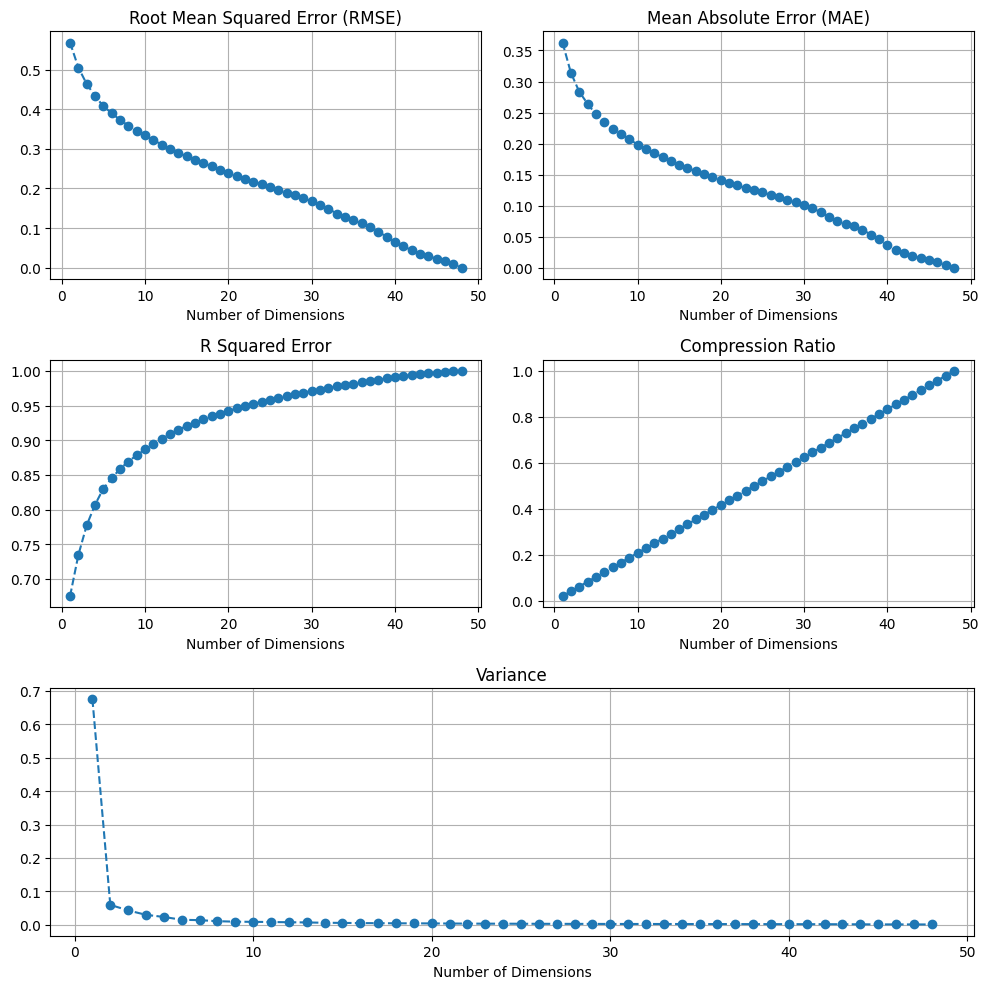

In [7]:
#Plotting the results
errorValues = pd.read_csv(
    "./Results/Smart Meters in London/Details SVD hh block_0.csv",
    )
errorValues.index += 1
numRows, numColums = errorValues.shape
plt.figure(figsize=(10, 10))
plt.subplot(3,2,1)
plt.plot(errorValues[['Root Mean Squared Values']], marker='o', linestyle='--')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(3,2,2)
plt.plot(errorValues[['Mean Absolute Values']], marker='o', linestyle='--')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(3,2,3)
plt.plot(errorValues[['R Squared Error Values']], marker='o', linestyle='--')
plt.title('R Squared Error')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(3,2,4)
plt.plot(errorValues[['Compression Ratio']], marker='o', linestyle='--')
plt.title('Compression Ratio')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(3,1,3)
plt.plot(errorValues[['Variance']], marker='o', linestyle='--')
plt.title('Variance')
plt.xlabel('Number of Dimensions')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
data = pd.read_csv(
    "../Datasets/Synthetic PMU Data/ACTIVSg2000 - Far West.csv")
data.dropna(inplace=True)

features = data[['Bus ODESSA 2 0 V pu',
 'Bus ODESSA 2 0 V angle',
 'Bus ODESSA 2 0 Frequency',
 'Bus PRESIDIO 2 0 V pu',
 'Bus PRESIDIO 2 0 V angle',
 'Bus PRESIDIO 2 0 Frequency',
 'Bus O DONNELL 1 0 V pu',
 'Bus O DONNELL 1 0 V angle',
 'Bus O DONNELL 1 0 Frequency',
 'Bus O DONNELL 1 1 V pu',
 'Bus O DONNELL 1 1 V angle',
 'Bus O DONNELL 1 1 Frequency',
 'Bus BIG SPRING 5 0 V pu',
 'Bus BIG SPRING 5 0 V angle',
 'Bus BIG SPRING 5 0 Frequency',
 'Bus BIG SPRING 5 1 V pu',
 'Bus BIG SPRING 5 1 V angle',
 'Bus BIG SPRING 5 1 Frequency',
 'Bus VAN HORN 0 V pu',
 'Bus VAN HORN 0 V angle',
 'Bus VAN HORN 0 Frequency',
 'Bus IRAAN 2 0 V pu',
 'Bus IRAAN 2 0 V angle',
 'Bus IRAAN 2 0 Frequency',
 'Bus IRAAN 2 1 V pu',
 'Bus IRAAN 2 1 V angle',
 'Bus IRAAN 2 1 Frequency',
 'Bus PRESIDIO 1 0 V pu',
 'Bus PRESIDIO 1 0 V angle',
 'Bus PRESIDIO 1 0 Frequency',
 'Bus PRESIDIO 1 1 V pu',
 'Bus PRESIDIO 1 1 V angle',
 'Bus PRESIDIO 1 1 Frequency',
 'Bus SANDERSON 0 V pu',
 'Bus SANDERSON 0 V angle',
 'Bus SANDERSON 0 Frequency',
 'Bus MONAHANS 2 0 V pu',
 'Bus MONAHANS 2 0 V angle',
 'Bus MONAHANS 2 0 Frequency',
 'Bus GRANDFALLS 0 V pu',
 'Bus GRANDFALLS 0 V angle',
 'Bus GRANDFALLS 0 Frequency',
 'Bus MARFA 0 V pu',
 'Bus MARFA 0 V angle',
 'Bus MARFA 0 Frequency',
 'Bus GARDEN CITY 0 V pu',
 'Bus GARDEN CITY 0 V angle',
 'Bus GARDEN CITY 0 Frequency',
 'Bus ODESSA 4 0 V pu',
 'Bus ODESSA 4 0 V angle',
 'Bus ODESSA 4 0 Frequency',
 'Bus NOTREES 0 V pu',
 'Bus NOTREES 0 V angle',
 'Bus NOTREES 0 Frequency',
 'Bus MIDLAND 4 0 V pu',
 'Bus MIDLAND 4 0 V angle',
 'Bus MIDLAND 4 0 Frequency',
 'Bus BIG SPRING 1 0 V pu',
 'Bus BIG SPRING 1 0 V angle',
 'Bus BIG SPRING 1 0 Frequency',
 'Bus BIG SPRING 1 1 V pu',
 'Bus BIG SPRING 1 1 V angle',
 'Bus BIG SPRING 1 1 Frequency',
 'Bus O DONNELL 2 0 V pu',
 'Bus O DONNELL 2 0 V angle',
 'Bus O DONNELL 2 0 Frequency',
 'Bus O DONNELL 2 1 V pu',
 'Bus O DONNELL 2 1 V angle',
 'Bus O DONNELL 2 1 Frequency',
 'Bus ODESSA 6 0 V pu',
 'Bus ODESSA 6 0 V angle',
 'Bus ODESSA 6 0 Frequency',
 'Bus BIG SPRINGS 0 V pu',
 'Bus BIG SPRINGS 0 V angle',
 'Bus BIG SPRINGS 0 Frequency',
 'Bus BIG SPRINGS 1 V pu',
 'Bus BIG SPRINGS 1 V angle',
 'Bus BIG SPRINGS 1 Frequency',
 'Bus MIDLAND 2 0 V pu',
 'Bus MIDLAND 2 0 V angle',
 'Bus MIDLAND 2 0 Frequency',
 'Bus COAHOMA 0 V pu',
 'Bus COAHOMA 0 V angle',
 'Bus COAHOMA 0 Frequency',
 'Bus MIDLAND 3 0 V pu',
 'Bus MIDLAND 3 0 V angle',
 'Bus MIDLAND 3 0 Frequency',
 'Bus ALPINE 0 V pu',
 'Bus ALPINE 0 V angle',
 'Bus ALPINE 0 Frequency',
 'Bus FORT DAVIS 0 V pu',
 'Bus FORT DAVIS 0 V angle',
 'Bus FORT DAVIS 0 Frequency',
 'Bus MCCAMEY 1 0 V pu',
 'Bus MCCAMEY 1 0 V angle',
 'Bus MCCAMEY 1 0 Frequency',
 'Bus MCCAMEY 1 1 V pu',
 'Bus MCCAMEY 1 1 V angle',
 'Bus MCCAMEY 1 1 Frequency',
 'Bus BIG SPRING 4 0 V pu',
 'Bus BIG SPRING 4 0 V angle',
 'Bus BIG SPRING 4 0 Frequency',
 'Bus BIG SPRING 4 1 V pu',
 'Bus BIG SPRING 4 1 V angle',
 'Bus BIG SPRING 4 1 Frequency',
 'Bus CRANE 0 V pu',
 'Bus CRANE 0 V angle',
 'Bus CRANE 0 Frequency',
 'Bus ODESSA 5 0 V pu',
 'Bus ODESSA 5 0 V angle',
 'Bus ODESSA 5 0 Frequency',
 'Bus FORT STOCKTON 1 0 V pu',
 'Bus FORT STOCKTON 1 0 V angle',
 'Bus FORT STOCKTON 1 0 Frequency',
 'Bus FORT STOCKTON 1 1 V pu',
 'Bus FORT STOCKTON 1 1 V angle',
 'Bus FORT STOCKTON 1 1 Frequency',
 'Bus ANDREWS 0 V pu',
 'Bus ANDREWS 0 V angle',
 'Bus ANDREWS 0 Frequency',
 'Bus FORSAN 0 V pu',
 'Bus FORSAN 0 V angle',
 'Bus FORSAN 0 Frequency',
 'Bus FORSAN 1 V pu',
 'Bus FORSAN 1 V angle',
 'Bus FORSAN 1 Frequency',
 'Bus FORSAN 2 V pu',
 'Bus FORSAN 2 V angle',
 'Bus FORSAN 2 Frequency',
 'Bus BIG LAKE 0 V pu',
 'Bus BIG LAKE 0 V angle',
 'Bus BIG LAKE 0 Frequency',
 'Bus MIDLAND 5 0 V pu',
 'Bus MIDLAND 5 0 V angle',
 'Bus MIDLAND 5 0 Frequency',
 'Bus OZONA 0 V pu',
 'Bus OZONA 0 V angle',
 'Bus OZONA 0 Frequency',
 'Bus MONAHANS 1 0 V pu',
 'Bus MONAHANS 1 0 V angle',
 'Bus MONAHANS 1 0 Frequency',
 'Bus MONAHANS 1 1 V pu',
 'Bus MONAHANS 1 1 V angle',
 'Bus MONAHANS 1 1 Frequency',
 'Bus MONAHANS 1 2 V pu',
 'Bus MONAHANS 1 2 V angle',
 'Bus MONAHANS 1 2 Frequency',
 'Bus MONAHANS 1 3 V pu',
 'Bus MONAHANS 1 3 V angle',
 'Bus MONAHANS 1 3 Frequency',
 'Bus MONAHANS 1 4 V pu',
 'Bus MONAHANS 1 4 V angle',
 'Bus MONAHANS 1 4 Frequency',
 'Bus MONAHANS 1 5 V pu',
 'Bus MONAHANS 1 5 V angle',
 'Bus MONAHANS 1 5 Frequency',
 'Bus MONAHANS 1 6 V pu',
 'Bus MONAHANS 1 6 V angle',
 'Bus MONAHANS 1 6 Frequency',
 'Bus STANTON 0 V pu',
 'Bus STANTON 0 V angle',
 'Bus STANTON 0 Frequency',
 'Bus ODONNELL 0 V pu',
 'Bus ODONNELL 0 V angle',
 'Bus ODONNELL 0 Frequency',
 'Bus LENORAH 0 V pu',
 'Bus LENORAH 0 V angle',
 'Bus LENORAH 0 Frequency',
 'Bus LENORAH 1 V pu',
 'Bus LENORAH 1 V angle',
 'Bus LENORAH 1 Frequency',
 'Bus IRAAN 3 0 V pu',
 'Bus IRAAN 3 0 V angle',
 'Bus IRAAN 3 0 Frequency',
 'Bus IRAAN 3 1 V pu',
 'Bus IRAAN 3 1 V angle',
 'Bus IRAAN 3 1 Frequency',
 'Bus IRAAN 3 2 V pu',
 'Bus IRAAN 3 2 V angle',
 'Bus IRAAN 3 2 Frequency',
 'Bus BIG SPRING 6 0 V pu',
 'Bus BIG SPRING 6 0 V angle',
 'Bus BIG SPRING 6 0 Frequency',
 'Bus BIG SPRING 6 1 V pu',
 'Bus BIG SPRING 6 1 V angle',
 'Bus BIG SPRING 6 1 Frequency',
 'Bus BIG SPRING 6 2 V pu',
 'Bus BIG SPRING 6 2 V angle',
 'Bus BIG SPRING 6 2 Frequency',
 'Bus ODESSA 3 0 V pu',
 'Bus ODESSA 3 0 V angle',
 'Bus ODESSA 3 0 Frequency',
 'Bus BIG SPRING 3 0 V pu',
 'Bus BIG SPRING 3 0 V angle',
 'Bus BIG SPRING 3 0 Frequency',
 'Bus BIG SPRING 3 1 V pu',
 'Bus BIG SPRING 3 1 V angle',
 'Bus BIG SPRING 3 1 Frequency',
 'Bus BIG SPRING 7 0 V pu',
 'Bus BIG SPRING 7 0 V angle',
 'Bus BIG SPRING 7 0 Frequency',
 'Bus MIDLAND 1 0 V pu',
 'Bus MIDLAND 1 0 V angle',
 'Bus MIDLAND 1 0 Frequency',
 'Bus IRAAN 1 0 V pu',
 'Bus IRAAN 1 0 V angle',
 'Bus IRAAN 1 0 Frequency',
 'Bus IRAAN 1 1 V pu',
 'Bus IRAAN 1 1 V angle',
 'Bus IRAAN 1 1 Frequency',
 'Bus ODESSA 1 0 V pu',
 'Bus ODESSA 1 0 V angle',
 'Bus ODESSA 1 0 Frequency',
 'Bus ODESSA 1 1 V pu',
 'Bus ODESSA 1 1 V angle',
 'Bus ODESSA 1 1 Frequency',
 'Bus ODESSA 1 2 V pu',
 'Bus ODESSA 1 2 V angle',
 'Bus ODESSA 1 2 Frequency',
 'Bus ODESSA 1 3 V pu',
 'Bus ODESSA 1 3 V angle',
 'Bus ODESSA 1 3 Frequency',
 'Bus ODESSA 1 4 V pu',
 'Bus ODESSA 1 4 V angle',
 'Bus ODESSA 1 4 Frequency',
 'Bus ODESSA 1 5 V pu',
 'Bus ODESSA 1 5 V angle',
 'Bus ODESSA 1 5 Frequency',
 'Bus ODESSA 1 6 V pu',
 'Bus ODESSA 1 6 V angle',
 'Bus ODESSA 1 6 Frequency',
 'Bus ODESSA 1 7 V pu',
 'Bus ODESSA 1 7 V angle',
 'Bus ODESSA 1 7 Frequency',
 'Bus ODESSA 1 8 V pu',
 'Bus ODESSA 1 8 V angle',
 'Bus ODESSA 1 8 Frequency',
 'Bus ODESSA 1 9 V pu',
 'Bus ODESSA 1 9 V angle',
 'Bus ODESSA 1 9 Frequency',
 'Bus ODESSA 1 10 V pu',
 'Bus ODESSA 1 10 V angle',
 'Bus ODESSA 1 10 Frequency',
 'Bus FORT STOCKTON 2 0 V pu',
 'Bus FORT STOCKTON 2 0 V angle',
 'Bus FORT STOCKTON 2 0 Frequency',
 'Bus FORT STOCKTON 3 0 V pu',
 'Bus FORT STOCKTON 3 0 V angle',
 'Bus FORT STOCKTON 3 0 Frequency',
 'Bus BIG SPRING 2 0 V pu',
 'Bus BIG SPRING 2 0 V angle',
 'Bus BIG SPRING 2 0 Frequency',
 'Bus KERMIT 0 V pu',
 'Bus KERMIT 0 V angle',
 'Bus KERMIT 0 Frequency',
 'Bus PECOS 0 V pu',
 'Bus PECOS 0 V angle',
 'Bus PECOS 0 Frequency',
 'Bus SHEFFIELD 0 V pu',
 'Bus SHEFFIELD 0 V angle',
 'Bus SHEFFIELD 0 Frequency',
 'Bus MCCAMEY 2 0 V pu',
 'Bus MCCAMEY 2 0 V angle',
 'Bus MCCAMEY 2 0 Frequency',
 'Bus LAMESA 0 V pu',
 'Bus LAMESA 0 V angle',
 'Bus LAMESA 0 Frequency',
 'Bus GOLDSMITH 0 V pu',
 'Bus GOLDSMITH 0 V angle',
 'Bus GOLDSMITH 0 Frequency',
 'Bus RALLS 2 0 V pu',
 'Bus RALLS 2 0 V angle',
 'Bus RALLS 2 0 Frequency']].astype(np.float32)

startTime = time.time()
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
svd = TruncatedSVD(n_components=48)
SVDDataset = pd.DataFrame(svd.fit_transform(scaled_features)).astype(np.float32)
endSVDcalcTime = time.time()
print("Time to apply SVD: " + str(endSVDcalcTime - startTime))
#Saving the data for future use
SVDDataset.to_csv('./Results/Synthetic PMU Far East/SVD_Results.csv', mode='w', index=False)
#calculating error based on number of dimensions
rootMeanSquaredValues = []
meanAbsoluteErrorValues = []
rSquaredErrorValues = []
compressionRatio = []
dimensions = range(1, scaled_features.shape[1] + 1)
for d in tqdm(dimensions):
    svd = TruncatedSVD(n_components=d)
    datasetReduced = svd.fit_transform(scaled_features).astype(np.float32) 
    datasetReconstructed = svd.inverse_transform(datasetReduced)
    rootMeanSquaredValues.append(root_mean_squared_error(scaled_features, datasetReconstructed, multioutput='uniform_average'))
    meanAbsoluteErrorValues.append(mean_absolute_error(scaled_features, datasetReconstructed))
    rSquaredErrorValues.append(r2_score(scaled_features, datasetReconstructed))
    compressionRatio.append(getsizeof(datasetReduced) / getsizeof(scaled_features) )
endErrorCalcTime = time.time()
print("Time taken to compute Errors: " + str(endErrorCalcTime - startTime))
Details = pd.DataFrame({
    'Root Mean Squared Values' : rootMeanSquaredValues,
    'Mean Absolute Values' : meanAbsoluteErrorValues,
    'R Squared Error Values' : rSquaredErrorValues,
    'Compression Ratio' : compressionRatio
    })
Details.index += 1
Details.to_csv('./Results/Synthetic PMU Far East/Details SVD.csv', mode='w', index=False)


Time to apply SVD: 1.8742070198059082


100%|██████████| 273/273 [17:28<00:00,  3.84s/it]


Time taken to compute Errors: 1056.0727803707123


ValueError: All arrays must be of the same length